#Modeling class probabilities via logistic regression

Although the perceptron rule offers a nice and easygoing introduction to machine
learning algorithms for classification, its biggest disadvantage is that it never converges if the classes are not perfectly linearly separable. The classification task in the previous section would be an example of such a scenario. Intuitively, we can think of the reason as the weights are continuously being updated since there is always at least one misclassified sample present in each epoch. Of course, you can change the learning rate and increase the number of epochs, but be warned that the perceptron will never converge on this dataset. To make better use of our time, we will now take a look at another simple yet more powerful algorithm for linear and binary classification problems: logistic regression. Note that, in spite of its name,
logistic regression is a model for classification, not regression.

Logistic regression is a classification model that is very easy to implement but
performs very well on linearly separable classes. It is one of the most widely used algorithms for classification in industry.



In the lecture, we introduced logit function, which is simply the logarithm of the odds ratio (log-odds).
$$
logit(p) = log\frac{p}{1-p}
$$

Let us plot it to see how it looks like.

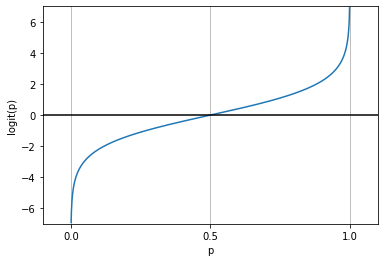

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def logit(p):
    return np.log(p / (1-p))
p = np.arange(0.001, 1, 0.001)
lp = logit(p)
plt.plot(p, lp)
plt.axhline(0, color='k')
plt.xlim(-0.1, 1.1)
plt.ylim(-7, 7)
plt.xlabel('p')
plt.ylabel('logit(p)')
plt.xticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.xaxis.grid(True)
plt.show()

As mentioned in the lecture, we are interested in the logistic sigmoid function (aka sigmoid function)

$$
\phi(z) = \frac{1}{1+e^{-z}}.
$$

Here $z$ is the net input, the linear combination of weights and sample features.

$$
z = {\bf w}^{\rm T}{\bf x} = w_0x_0+w_1x_1+...+w_mx_m
$$

Let us plot the sigmoid function for some values in the range -7 to 7 to
see how it looks.

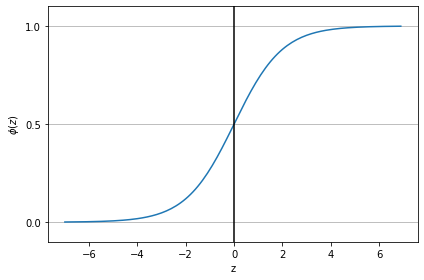

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

We can see that the S-shaped (sigmoidal) curve approaches $1$ if $z$ goes towards infinity since $e^{-z}$ becomes very small for large values of $z$
Similarly, $\phi(z)$ goes towards $0$ for $z → -\infty $ as a result of an increasingly large denominator. Thus, we conclude that this sigmoid
function takes real number values as input and transforms them into values in the range [0, 1] with an intercept at $\phi(0) = 0.5$.

In class we modelled the log-likelihood as a cost function as follows.

$$
J({\bf w}) = \sum^n_{i=1}[-y^{(i)}log(\phi(z^{(i)}))-(1-y^{(i)})log(1-\phi(z^{(i)}))]
$$

Let's write a short code snippet to create a plot  that illustrates the cost of classifying a single-sample instance for different values of $\phi(z)$.

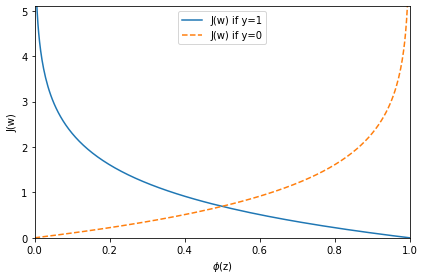

In [ ]:
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The resulting plot shows the sigmoid activation on the x axis, in the range 0 to 1 (the inputs to the sigmoid function were z values in the range -10 to 10 ) and the associated logistic cost on the y-axis.

We can see that the cost approaches 0 (continuous line) if we correctly predict that a sample belongs to class 1. Similarly, we can see on the y-axis that the cost also approaches 0 if we correctly predict 0 y = (dashed line). However, if the prediction is wrong, the cost goes towards infinity. The main  point is that we penalize wrong predictions with an increasingly larger cost.

If we were to implement logistic regression ourselves, we could simply substitute the cost function J in our Adaline implementation with the new cost function
$$
J({\bf w}) = \sum^n_{i=1}[-y^{(i)}log(\phi(z^{(i)}))-(1-y^{(i)})log(1-\phi(z^{(i)}))]
$$
We use this to compute the cost of classifying all training samples per epoch. Also, we need to swap the linear activation function with the sigmoid activation and change the threshold function to return class labels 0 and 1 instead of -1 and 1. If we make those three changes to the Adaline code, we  end up with a working logistic regression implementation.

In [ ]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Let's reuse some of our previous code to load the dataset and to plot decision regions.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],
                    label=cl, edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1,
                    marker='o', s=100, label='test set')

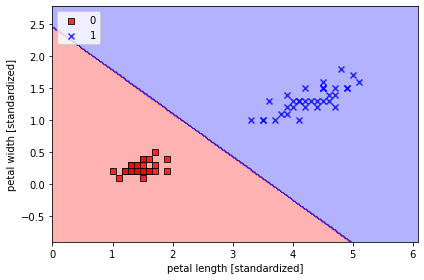

[ True  True False False  True False False  True False  True  True  True
  True  True  True False  True  True  True  True False False  True  True
  True False  True False False False  True  True False False False False
  True False False  True False  True False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True False  True  True  True False  True
  True False False  True  True  True False  True False False  True  True
 False False  True  True False  True False  True  True  True  True False
  True  True  True  True  True  True  True  True  True]


In [ ]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print((y_train == 0) | (y_train == 1))

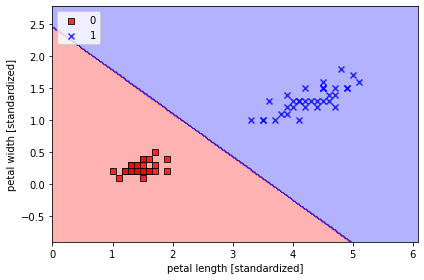

[ True  True False False  True False False  True False  True  True  True
  True  True  True False  True  True  True  True False False  True  True
  True False  True False False False  True  True False False False False
  True False False  True False  True False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True False  True  True  True False  True
  True False False  True  True  True False  True False False  True  True
 False False  True  True False  True False  True  True  True  True False
  True  True  True  True  True  True  True  True  True]


In [ ]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print((y_train == 0) | (y_train == 1))

When we `fit` a logistic regression model, we have to keep in mind that it only works for binary classification tasks. So, let us consider only Iris-setosa and Iris-versicolor flowers (classes 0 and 1) and check that our implementation of logistic regression works.

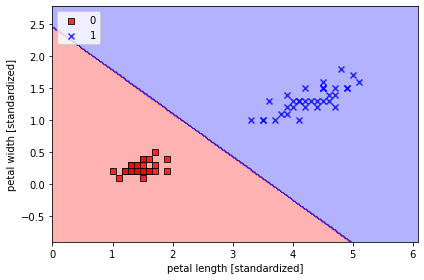

[ True  True False False  True False False  True False  True  True  True
  True  True  True False  True  True  True  True False False  True  True
  True False  True False False False  True  True False False False False
  True False False  True False  True False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True False  True  True  True False  True
  True False False  True  True  True False  True False False  True  True
 False False  True  True False  True False  True  True  True  True False
  True  True  True  True  True  True  True  True  True]


In [ ]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print((y_train == 0) | (y_train == 1))

Using calculus, we can show that the weight update in logistic regression via gradient descent is equal to the equation that we used in Adaline.

#Training a logistic regression model with scikit-learn

We just went through useful coding and math exercises in the previous subsection, which helped illustrate the conceptual differences between Adaline and logistic regression. Now, let's learn how to use scikit-learn's more optimized implementation of logistic regression that also supports multi-class settings off the shelf (OvR by default). In the following code example, we will use the `sklearn.linear_model` `LogisticRegression` class as well as the familiar fit method to train the model on all three classes in the standardized flower training dataset.

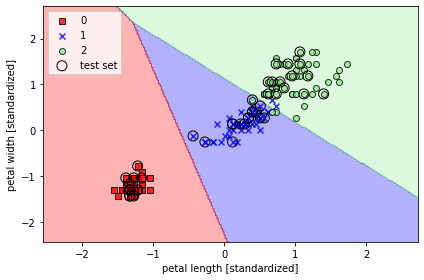

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be conv

Looking at the preceding code that we used to train the `LogisticRegression` model, you might now be wondering, "What is this mysterious parameter `C` ?" We
will discuss this parameter in the next subsection, where we first introduce the
concepts of overfitting and regularization. However, before we are moving on to
those topics, let's finish our discussion of class-membership probabilities.



The probability that training examples belong to a certain class can be computed using the `predict_proba` method. For example, we can predict the probabilities of the first three samples in the test set as follows.

In [ ]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

The first row corresponds to the class-membership probabilities of the first flower, the second row corresponds to the class-membership probabilities of the second flower, and so forth. Notice that the columns sum all up to one, as expected. You can confirm this by executing.

In [ ]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

The highest value in the first row is approximately 0.853, which means that the first sample belongs to class three (Iris-virginica) with a predicted probability of 85.7 percent. So, as you may have already noticed, we can get the predicted class labels by identifying the largest column in each row, for example, using NumPy's `argmax` function

In [ ]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

The returned class indices are shown (they correspond to Iris-virginica, Iris-setosa , and Iris-setosa).

The class labels we obtained from the preceding conditional probabilities is, of
course, just a manual approach to calling the predict method directly, which we can quickly verify as follows:

In [ ]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

#Tackling overfitting via regularization

Overfitting is a common problem in machine learning, where a model performs well
on training data but does not generalize well to unseen data (test data). If a model suffers from overfitting, we also say that the model has a high variance, which can be caused by having too many parameters that lead to a model that is too complex given the underlying data. Similarly, our model can also suffer from underfitting (high bias), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data.

One way of finding a good bias-variance tradeoff is to tune the complexity of
the model via regularization. The most common form of regularization is so-called L2 regularization (sometimes also called L2 shrinkage or weight decay), which can be written as follows.

$$
...
$$

The term C is directly related to the regularization parameter λ , which is its inverse. Consequently, decreasing the value of the inverse regularization parameter C means that we are increasing the regularization strength, which we can visualize by plotting the L2-regularization path for the two weight
coefficients

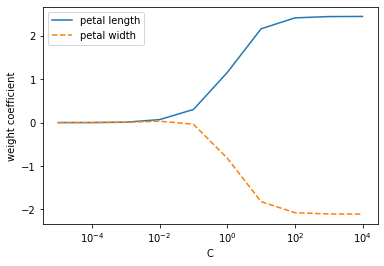

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='liblinear', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

By executing the preceding code, we fitted ten logistic regression models with
different values for the inverse-regularization parameter C . For the purposes of illustration, we only collected the weight coefficients of class 1 (here, the second class in the dataset, Iris-versicolor ) versus all  classifiers—remember that we are using the OvR technique for multiclass classification.

As we can see in the resulting plot, the weight coefficients shrink if we decrease parameter C , that is, if we increase the regularization strength: